<h1>Global Trends: Reader's Favorite Popularity</h1>

Introduction


In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

trends_one= pd.read_csv('Books_Data_Clean.csv')# Exposure basis likely, Lacks variation of mix genres
trends_two= pd.read_csv('data.csv') # w/ book descriptions and genre
genre_trend= pd.read_excel('Amazon_genres.xlsx')

# General Information Function
def EDA(df):
    print(df.info())
    print(df.columns)
    
    # Count/Percentage of Count for each column of selected dataset
    #print(df.count())
    maxRows = df[df.columns[0]].count()
    print('% of Missing Data:')
    print((1 - df.count() / maxRows) * 100)
    
    # Summary Statistics
    print(df.describe())
        
EDA(trends_one)
EDA(trends_two)
EDA(genre_trend)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                1070 non-null   int64  
 1   Publishing Year      1069 non-null   float64
 2   Book Name            1047 non-null   object 
 3   Author               1070 non-null   object 
 4   language_code        1017 non-null   object 
 5   Author_Rating        1070 non-null   object 
 6   Book_average_rating  1070 non-null   float64
 7   Book_ratings_count   1070 non-null   int64  
 8   genre                1070 non-null   object 
 9   gross sales          1070 non-null   float64
 10  publisher revenue    1070 non-null   float64
 11  sale price           1070 non-null   float64
 12  sales rank           1070 non-null   int64  
 13  Publisher            1070 non-null   object 
 14  units sold           1070 non-null   int64  
dtypes: float64(5), int64(4), object(6)
mem

Clean Up

In [73]:
#Trends 1
trends_one.drop(columns= 'index', inplace=True)
trends_one['Book Name'].fillna('Unknown', inplace=True)
trends_one['language_code'].fillna('eng', inplace=True)
trends_one.rename(columns={'language_code': 'language'}, inplace=True)
trends_one.dropna(subset=['Publishing Year'], inplace=True)
trends_one['Publishing Year'] = trends_one['Publishing Year'].astype(int)
trends_one.info()

#Trends 2
trends_two.drop(columns=['isbn13','isbn10','subtitle','thumbnail', 'description'], inplace=True)
trends_two.fillna({'categories': 'Unknown', 'authors': 'Unknown'}, inplace=True)
trends_two.fillna({'average_rating': 0, 'num_pages': 0, 'ratings_count':0}, inplace=True)
trends_two.dropna(subset=['published_year'], inplace=True)
identical= trends_two.duplicated().value_counts()
#print(identical)
trends_two.info()

#Genre 
genre_trend['Author'].fillna('Unknown', inplace=True)
genre_trend.drop(columns=['No. of People rated', 'URLs'], inplace=True)
duplicated = genre_trend.duplicated().value_counts()
genre_trend.info()
#print(duplicated)

<class 'pandas.core.frame.DataFrame'>
Index: 1069 entries, 0 to 1069
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Publishing Year      1069 non-null   int32  
 1   Book Name            1069 non-null   object 
 2   Author               1069 non-null   object 
 3   language             1069 non-null   object 
 4   Author_Rating        1069 non-null   object 
 5   Book_average_rating  1069 non-null   float64
 6   Book_ratings_count   1069 non-null   int64  
 7   genre                1069 non-null   object 
 8   gross sales          1069 non-null   float64
 9   publisher revenue    1069 non-null   float64
 10  sale price           1069 non-null   float64
 11  sales rank           1069 non-null   int64  
 12  Publisher            1069 non-null   object 
 13  units sold           1069 non-null   int64  
dtypes: float64(4), int32(1), int64(3), object(6)
memory usage: 121.1+ KB
<class 'pandas.core.fram

Top 50 by Average rating

<Axes: xlabel='average_rating', ylabel='title'>

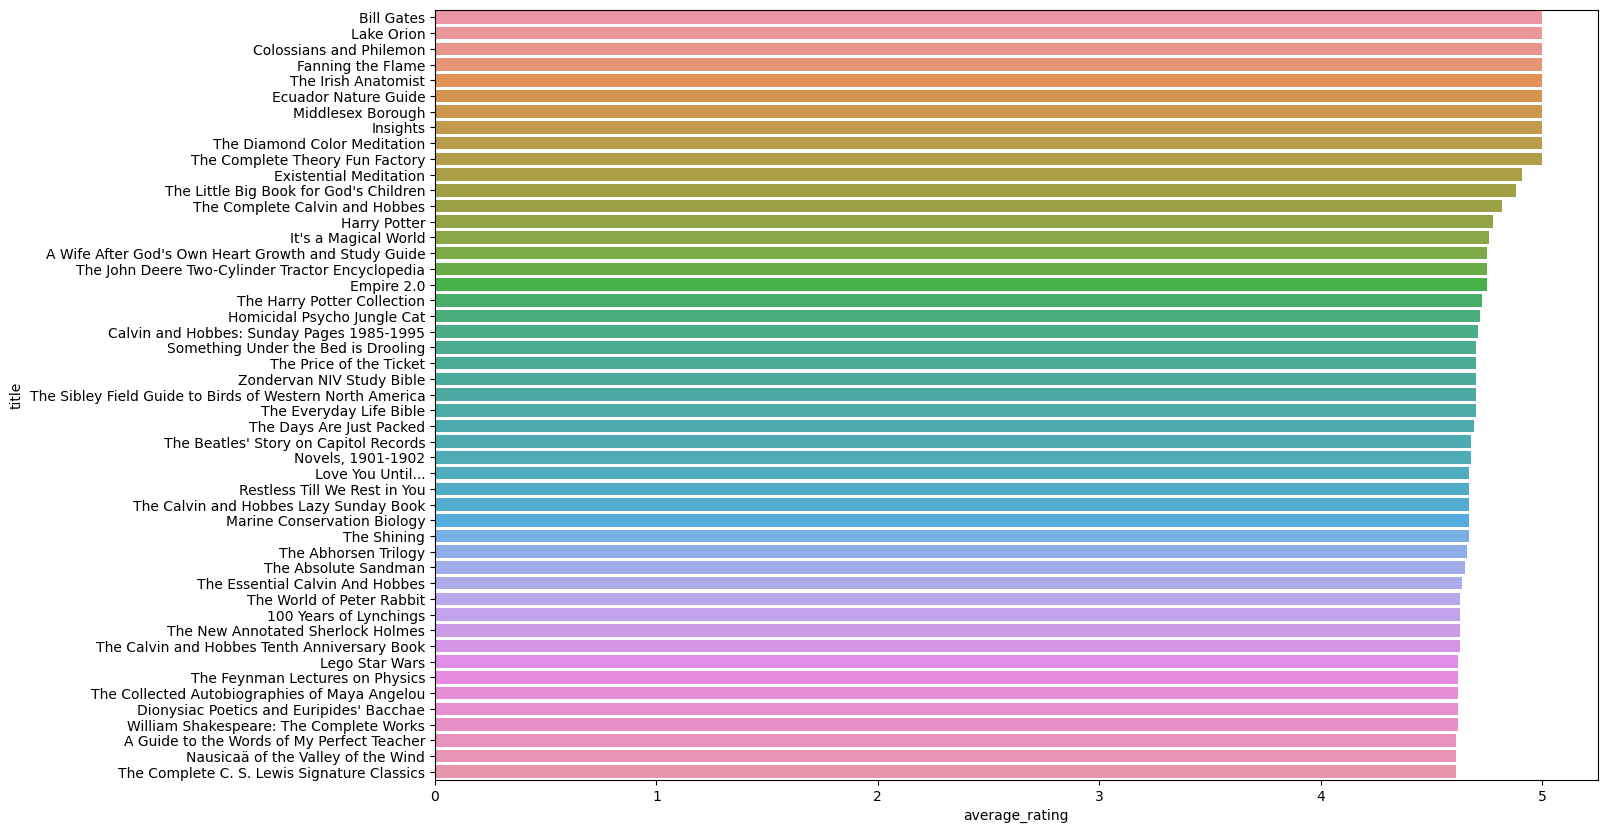

In [74]:
top_50 = trends_two.sort_values(by=['average_rating'], ascending=False).reset_index(drop=True)
#print(top_50.head(50))

plt.figure(figsize=(15,10))
sns.barplot(top_50.head(50), x='average_rating', y='title')

Average Rating Distribution 

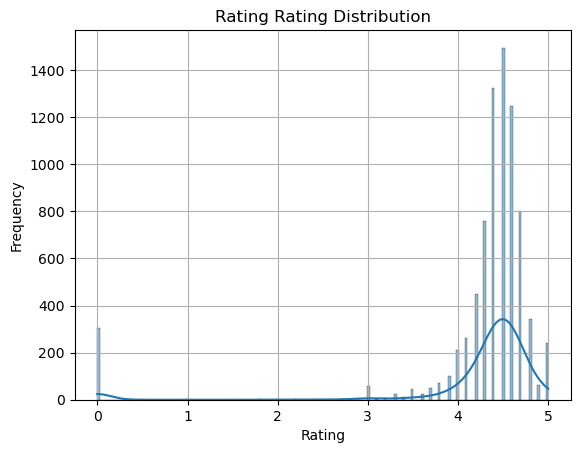

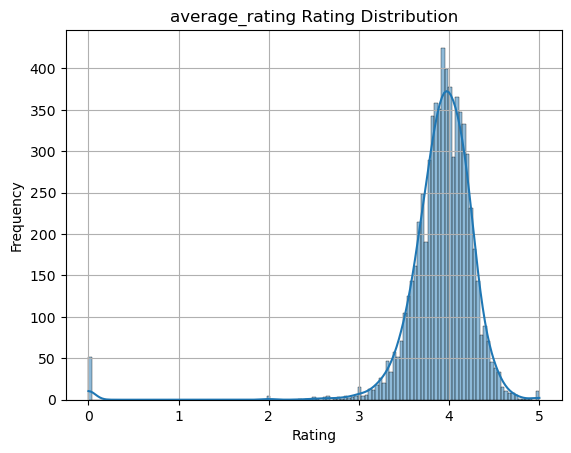

In [75]:
def avg_rating_distribution(df,avg_col):
    plt.title('Avg Rating Histogram')
    sns.histplot(df[avg_col], kde=True)
    plt.grid(True)
    plt.title(f'{avg_col} Rating Distribution')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.show()

avg_rating_distribution(genre_trend, 'Rating')
avg_rating_distribution(trends_two, 'average_rating')


Most trending genre by Avenge rating


Main_Genre
Children's Books                         1450
Romance                                  1124
Sports                                    854
Literature & Fiction                      400
Teen & Young Adult                        350
Computing, Internet & Digital Media       350
Crafts, Home & Lifestyle                  300
Religion                                  300
Medicine & Health Sciences                250
Arts, Film & Photography                  200
Reference                                 200
Society & Social Sciences                 200
Exam Preparation                          200
Sciences, Technology & Medicine           200
Higher Education Textbooks                200
Science & Mathematics                     150
Politics                                  150
Business & Economics                      150
Biographies, Diaries & True Accounts      100
History                                   100
Fantasy, Horror & Science Fiction         100
Comics & Mangas        

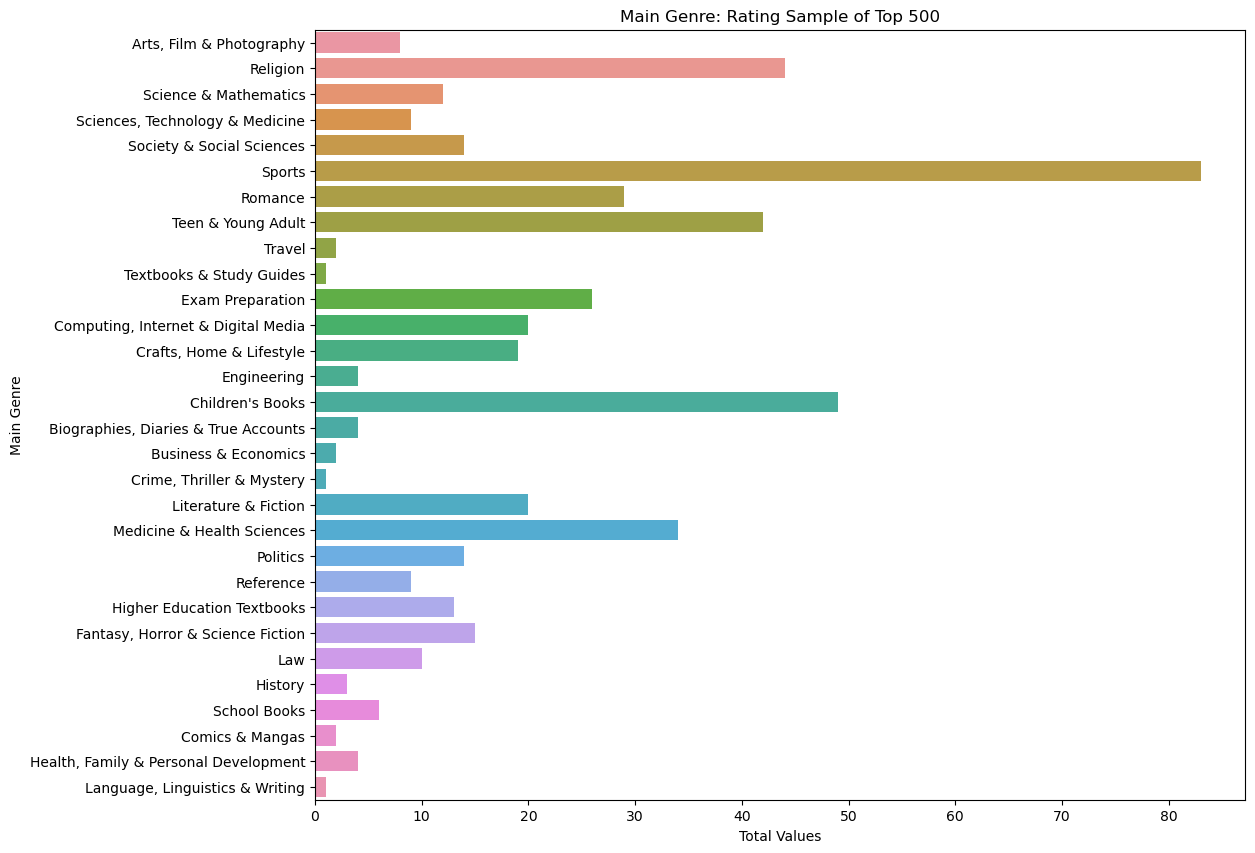

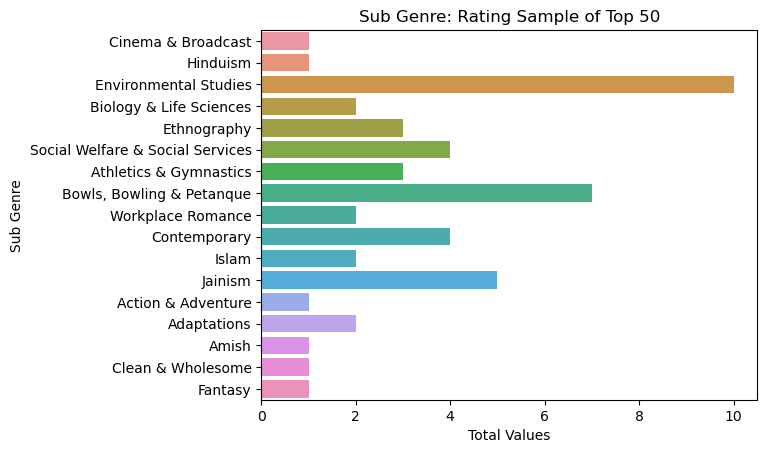

<Figure size 640x480 with 0 Axes>

In [76]:
# Standard
main = genre_trend['Main_Genre'].value_counts()
sub = genre_trend['Sub_Genre'].value_counts()
print(f'{main}\n\n\n{sub}')

# By Rating
main_rating = genre_trend.sort_values(by=['Rating'], ascending=False).reset_index()
sub_rating = genre_trend.sort_values(by=['Rating'], ascending=False).reset_index()

plt.figure(figsize=(12,10))

plt.title('Main Genre: Rating Sample of Top 500')
sns.countplot(data=main_rating.head(500), y='Main_Genre')
plt.ylabel('Main Genre')
plt.xlabel('Total Values')

plt.show()
plt.clf()

plt.title('Sub Genre: Rating Sample of Top 50')
sns.countplot(data=sub_rating.head(50), y='Sub_Genre')
plt.xlabel('Total Values')
plt.ylabel('Sub Genre')

plt.show()
plt.clf()


Top 50 Authors by Revenue

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7928 entries, 0 to 7927
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   7928 non-null   int64  
 1   Title        7928 non-null   object 
 2   Author       7928 non-null   object 
 3   Main_Genre   7928 non-null   object 
 4   Sub_Genre    7928 non-null   object 
 5   Type         7928 non-null   object 
 6   IDR_Price    7928 non-null   float64
 7   USD_Revenue  7928 non-null   float64
 8   Rating       7928 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 557.6+ KB


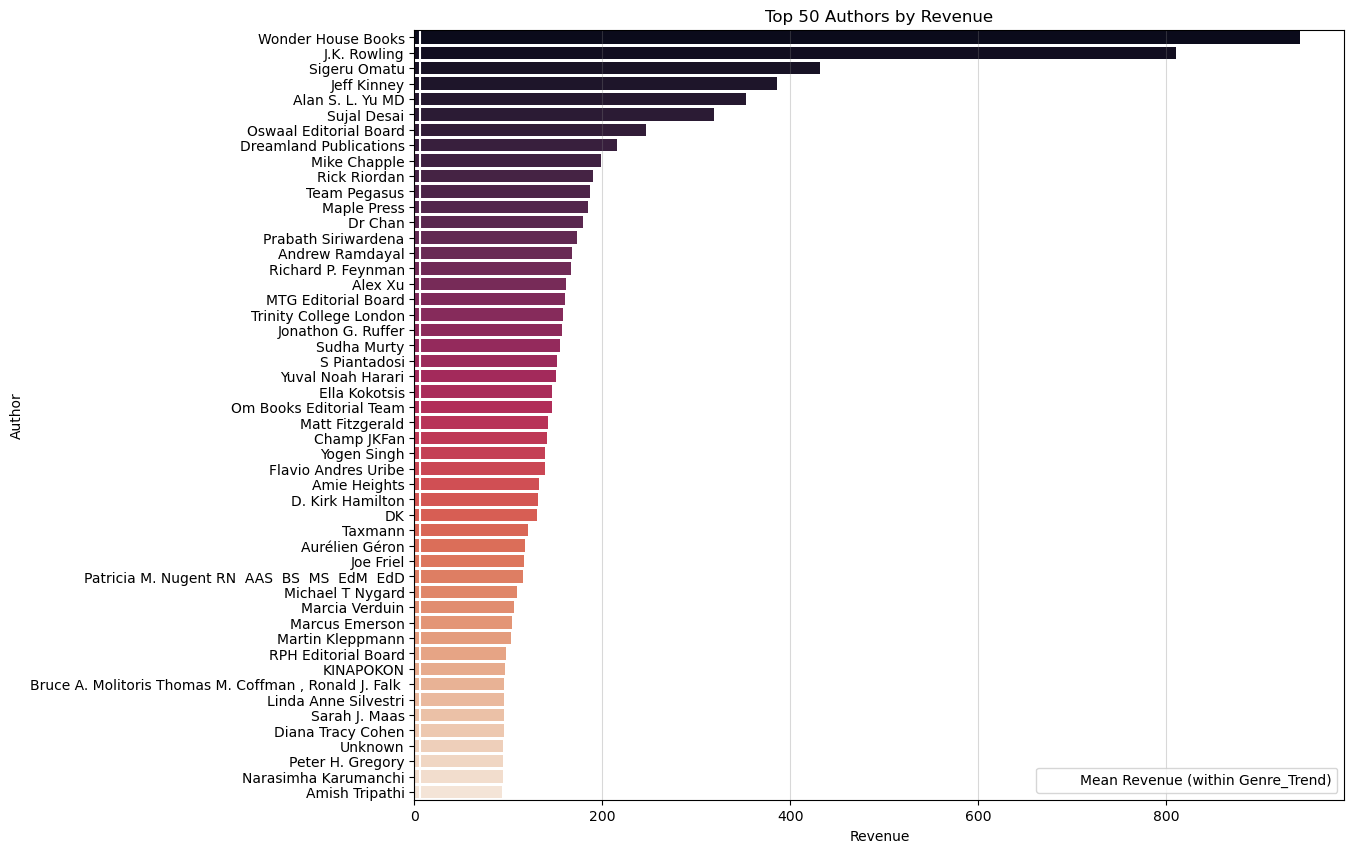

In [98]:
genre_trend.rename(columns={'USD_Price':'USD_Revenue'}, inplace=True)
genre_trend.info()

author_sales = (genre_trend.groupby('Author')['USD_Revenue'].sum()).sort_values(ascending = False).head(50)

plt.figure(figsize = (12,10))

sns.barplot(y = author_sales.index, x = author_sales, palette="rocket")
plt.grid(True, axis = 'x', color= 'grey', alpha = 0.3)
plt.axvline(x=genre_trend['USD_Revenue'].mean(), color='#FFFFFF', label='Mean Revenue (within Genre_Trend)')
plt.title('Top 50 Authors by Revenue')
plt.xlabel('Revenue')
plt.legend()
plt.show()


Trending Genre Globally 
sales in each genre

                                       USD_Revenue
Main_Genre                                        
Arts, Film & Photography               1524.280964
Biographies, Diaries & True Accounts    345.173494
Business & Economics                    728.097952
Children's Books                       5029.644819
Comics & Mangas                         358.303253
Computing, Internet & Digital Media    5089.469639
Crafts, Home & Lifestyle               1914.355422
Crime, Thriller & Mystery               168.032530
Engineering                             360.261325
Exam Preparation                       1248.609398
Fantasy, Horror & Science Fiction       512.523494
Health, Family & Personal Development   358.459157
Higher Education Textbooks             1514.577831
History                                 383.967711
Language, Linguistics & Writing         265.727470
Law                                     501.806024
Literature & Fiction                   1410.436627
Medicine & Health Sciences     

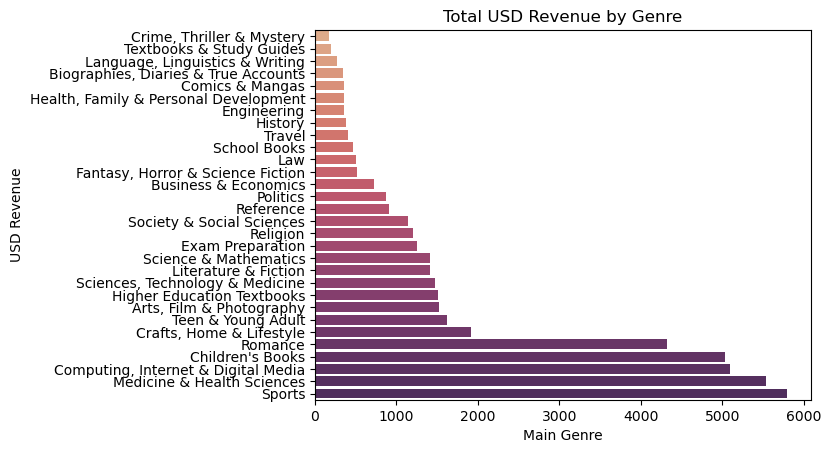

<Figure size 640x480 with 0 Axes>

In [ ]:
sales_genre = genre_trend.groupby('Main_Genre').aggregate({'USD_Revenue':np.sum})
print(sales_genre)

sales_genre_sorted = sales_genre.sort_values(by='USD_Revenue', ascending=True)
sns.barplot(y=sales_genre_sorted.index, x=sales_genre_sorted['USD_Revenue'], palette="flare", )
plt.title('Total USD Revenue by Genre')
plt.xlabel('Main Genre')
plt.ylabel('USD Revenue')

plt.show()
plt.clf()



Conclusion